In [38]:
import pandas as pd
import mysql.connector as msql
from mysql.connector import Error
import seaborn as sns
import matplotlib.pyplot as plt
# This file contains our login information for the MySQL server
import credentials as C

# Find and plot the percentage of applications approved for self-employed applicants.

Lets pull the data from the db to see what we're working with.  Lets connect to the db first.

In [39]:
try:
    global conn
    conn = msql.connect(host = C.host_name, database = 'creditcard_capstone', 
                        user = C.user_name, password = C.password)
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
except Error as e:
    print('Error while connecting to MySQL',e)

You're connected to database:  ('creditcard_capstone',)


Lets create a SQL query that will pull the information we need to directly answer our question.

In [40]:
yes_self_sql = ("SELECT Application_Status, COUNT(*) AS Count "
                "FROM cdw_sapp_loan_application "
                "WHERE Self_employed = 'Yes' "
                "GROUP BY Application_Status")
cursor.execute(yes_self_sql)                #cursor was assigned in the connect_sql() function
yes_self_result = cursor.fetchall()          #fetches all the results
self_yes_df = pd.DataFrame(yes_self_result)
self_yes_df

,0,1
0,Y,46
1,N,24


Now lets visualize this data.

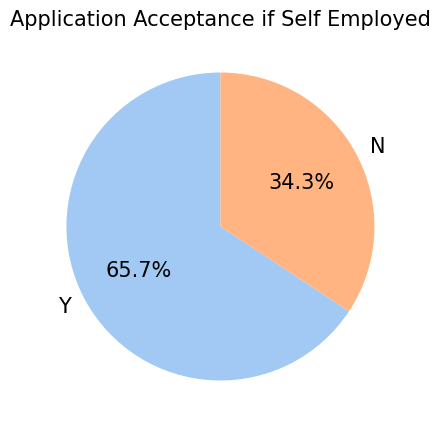

In [41]:
plt.figure(figsize=(5, 5))
plt.pie(self_yes_df.iloc[:, 1], labels=self_yes_df.iloc[:, 0], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Application Acceptance if Self Employed', fontdict={'fontsize': 15})
plt.rc('axes', labelsize= 20)

plt.rcParams.update({'font.size': 15})
plt.show()

Now lets compare it to the regular loan application acceptance rate.  First, lets pull the data for all application statuses using a SQL query.

In [42]:
norm_status_sql = ("SELECT Application_Status, COUNT(*) AS Count "
                    "FROM cdw_sapp_loan_application "
                    "GROUP BY Application_Status")
cursor.execute(norm_status_sql)                #cursor was assigned in the connect_sql() function
norm_results = cursor.fetchall()          #fetches all the results
norm_app_status_df = pd.DataFrame(norm_results)
norm_app_status_df

,0,1
0,Y,347
1,N,164


Lets look at the data side by side.

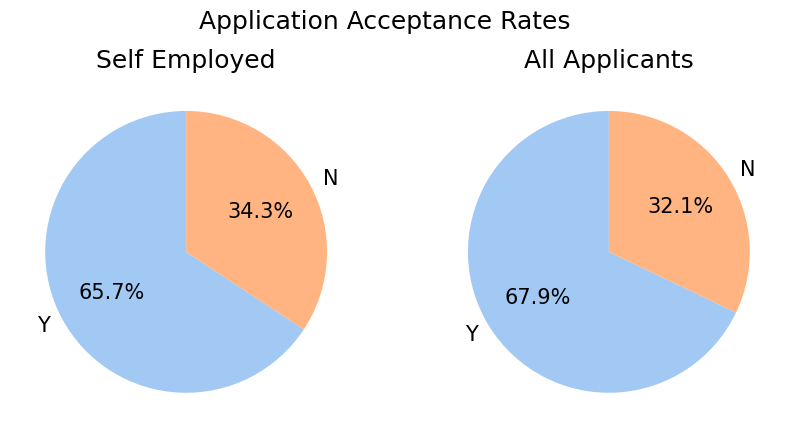

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Application Acceptance Rates")

# first pie chart
axes[0].pie(self_yes_df.iloc[:, 1], labels=self_yes_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('Self Employed')

# second pie chart
axes[1].pie(norm_app_status_df.iloc[:, 1], labels=norm_app_status_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('All Applicants')

plt.show()

# Find the percentage of rejection for married male applicants.

Lets create the SQL query to find the answer to the question.

In [44]:
mar_male_sql = ("SELECT Application_Status, COUNT(*) AS Count "
                    "FROM cdw_sapp_loan_application "
                    "WHERE Gender = 'Male' AND Married = 'Yes' "
                    "GROUP BY Application_Status "
                    "ORDER BY Count DESC")
cursor.execute(mar_male_sql)                #cursor was assigned in the connect_sql() function
mar_male_results = cursor.fetchall()          #fetches all the results
mar_male_df = pd.DataFrame(mar_male_results)
mar_male_df

,0,1
0,Y,219
1,N,87


Lets create a pie chart to see the results and, as a benchmark, lets create a second pie chart of all males to see how the married males compare.

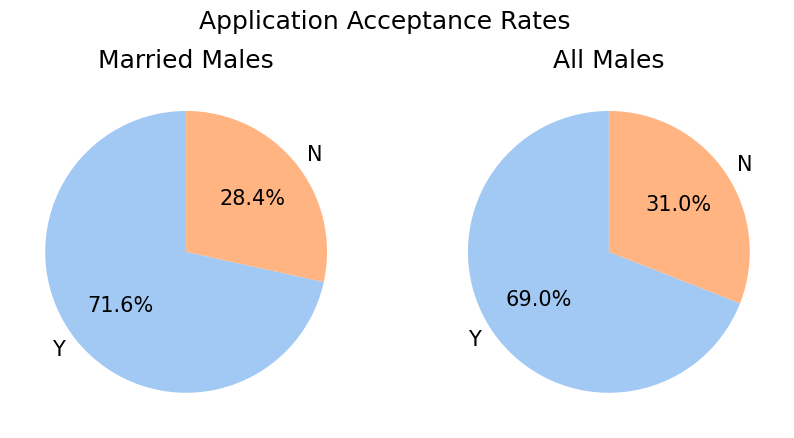

In [45]:
male_sql = ("SELECT Application_Status, COUNT(*) AS Count "
            "FROM cdw_sapp_loan_application "
            "WHERE Gender = 'Male' "
            "GROUP BY Application_Status")
cursor.execute(male_sql)                #cursor was assigned in the connect_sql() function
male_results = cursor.fetchall()          #fetches all the results
male_df = pd.DataFrame(male_results)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Application Acceptance Rates")

# first pie chart
axes[0].pie(mar_male_df.iloc[:, 1], labels=mar_male_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('Married Males')

# second pie chart
axes[1].pie(male_df.iloc[:, 1], labels=male_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('All Males')

plt.show()

Now lets compare married males to all married applicants regardless of gender to see if there is a gender bias.

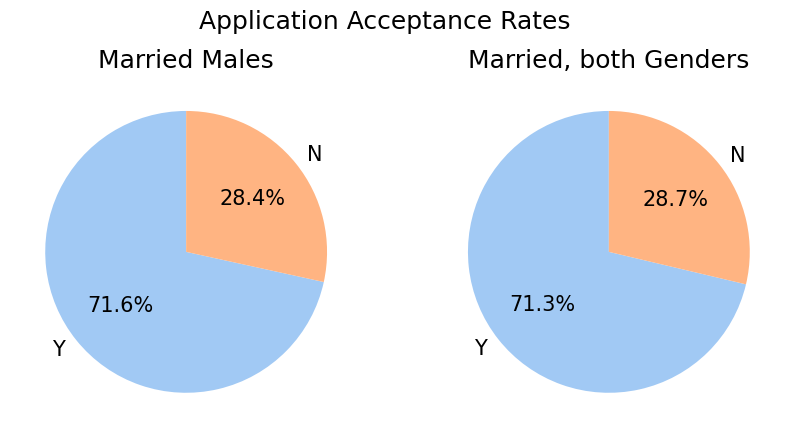

In [46]:
mar_sql = ("SELECT Application_Status, COUNT(*) AS Count "
            "FROM cdw_sapp_loan_application "
            "WHERE Married = 'Yes' "
            "GROUP BY Application_Status "
            "ORDER BY Count DESC")
cursor.execute(mar_sql)                #cursor was assigned in the connect_sql() function
mar_results = cursor.fetchall()          #fetches all the results
mar_df = pd.DataFrame(mar_results)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Application Acceptance Rates")

# first pie chart
axes[0].pie(mar_male_df.iloc[:, 1], labels=mar_male_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('Married Males')

# second pie chart
axes[1].pie(mar_df.iloc[:, 1], labels=mar_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Married, both Genders')

plt.show()

# Find and plot the top three months with the largest transaction data.

Lets query the relevant data

In [47]:
top_mon_val_sql = ("SELECT SUBSTRING(TIMEID,5,2) AS mon, sum(transaction_value) as total "
                "FROM cdw_sapp_credit_card "
                "GROUP BY mon "
                "ORDER BY total DESC "
                "LIMIT 3")

cursor.execute(top_mon_val_sql)                #cursor was assigned in the connect_sql() function
top_mon_val_results = cursor.fetchall()          #fetches all the results
top_mon_val_df = pd.DataFrame(top_mon_val_results)
top_mon_val_df

,0,1
0,10,202583.89
1,05,201310.26
2,12,201251.08


Lets change the Months to their names

In [48]:
month_names = {'10': 'October', '05': 'May', '12': 'December'}
top_mon_val_df = top_mon_val_df.rename(columns={0: 'Month'})

# Map the new names to the values in the 'Month' column
top_mon_val_df['Month'] = top_mon_val_df['Month'].map(month_names)
top_mon_val_df

top_mon_val_df = top_mon_val_df.rename(columns={1: 'Total Value'})

Now lets pull the top 3 months for number of transactions

In [49]:
top_mon_qty_sql = ("SELECT SUBSTRING(TIMEID,5,2) AS mon, count(transaction_value) as total "
                "FROM cdw_sapp_credit_card "
                "GROUP BY mon "
                "ORDER BY total DESC "
                "LIMIT 3")

cursor.execute(top_mon_qty_sql)                #cursor was assigned in the connect_sql() function
top_mon_qty_results = cursor.fetchall()          #fetches all the results
top_mon_qty_df = pd.DataFrame(top_mon_qty_results)
top_mon_qty_df

,0,1
0,02,3959
1,05,3946
2,10,3946


Lets rename the columns and change the months to a name format

In [50]:
month_names = {'02': 'February', '05': 'May', '10': 'October'}
top_mon_qty_df = top_mon_qty_df.rename(columns={0: 'Month'})

# Map the new names to the values in the 'Month' column
top_mon_qty_df['Month'] = top_mon_qty_df['Month'].map(month_names)
top_mon_qty_df

top_mon_qty_df = top_mon_qty_df.rename(columns={1: 'Quantity'})
top_mon_qty_df

,Month,Quantity
0,February,3959
1,May,3946
2,October,3946


Lets place these two dataframes as plots side by side

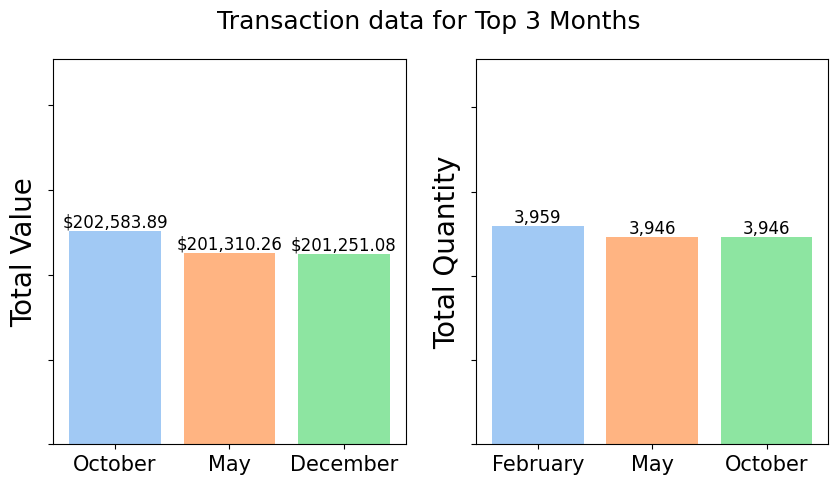

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Transaction data for Top 3 Months")

# first bar chart
chart1 = axes[0].bar(top_mon_val_df.iloc[:, 0], top_mon_val_df.iloc[:, 1], color=sns.color_palette('pastel'))
axes[0].set_ylabel('Total Value')
axes[0].set_ylim(bottom=190000)
axes[0].set_yticklabels([])
for bar in chart1:
    height = bar.get_height()
    text = '${:,.2f}'.format(height)   #format number to be a currency format
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, text, ha='center', va='bottom', fontsize = 12)

# second bar chart
chart2 = axes[1].bar(top_mon_qty_df.iloc[:, 0], top_mon_qty_df.iloc[:, 1], color=sns.color_palette('pastel'))
axes[1].set_ylabel('Total Quantity')
axes[1].set_ylim(bottom=3700)
axes[1].set_yticklabels([])  
for bar in chart2:
    height = bar.get_height()
    text = '{:,}'.format(height)   #format number to be a currency format
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, text, ha='center', va='bottom', fontsize = 12)

plt.show()

# Find and plot which branch processed the highest total dollar value of healthcare transactions.

Lets make a query to pull the relevant data

In [52]:
branch_health_sql = ("SELECT BRANCH_CODE, sum(transaction_value) as total "
                    "FROM cdw_sapp_credit_card "
                    "WHERE TRANSACTION_TYPE = 'healthcare' "
                    "GROUP BY BRANCH_CODE "
                    "ORDER BY total DESC "
                    "LIMIT 10")

cursor.execute(branch_health_sql)                #cursor was assigned in the connect_sql() function
branch_health_results = cursor.fetchall()          #fetches all the results
branch_health_df = pd.DataFrame(branch_health_results)
branch_health_df = branch_health_df.rename(columns={0: 'Branch Code'})
branch_health_df = branch_health_df.rename(columns={1: 'Transaction Value'})
branch_health_df

,Branch Code,Transaction Value
0,25,4370.18
1,60,4072.04
2,83,4003.37
3,36,3823.87
4,111,3720.27
5,90,3697.16
6,21,3651.74
7,109,3603.67
8,42,3603.25
9,70,3594.35


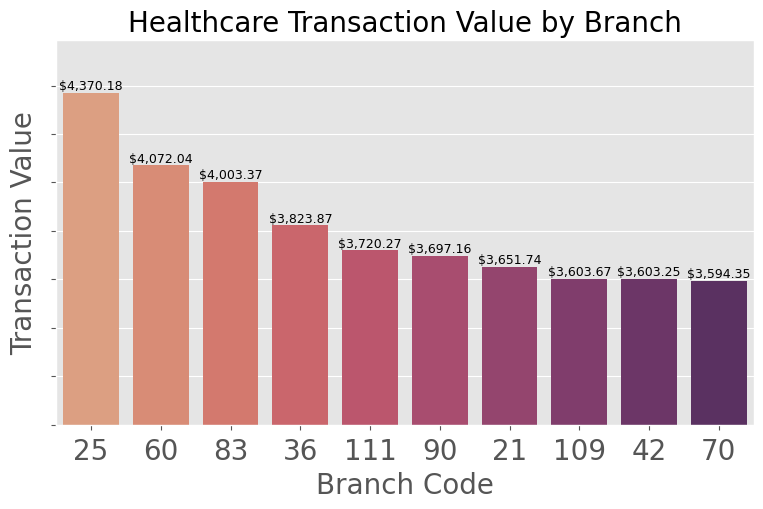

In [ ]:
plt.figure(figsize=(9, 5))
chart1 = sns.barplot(x=branch_health_df['Branch Code'], y=branch_health_df['Transaction Value'],\
    order=branch_health_df.sort_values('Transaction Value', ascending=False)['Branch Code'], palette='flare')
# here we add the actual value to the top of each bar
for i, v in enumerate(branch_health_df['Transaction Value']):
    plt.annotate('${:,.2f}'.format(v), (i, v), ha='center', va='bottom', fontsize = 9)
    
chart1.set_ylim(bottom=3000)
chart1.set_yticklabels([])  
plt.title('Healthcare Transaction Value by Branch')
plt.show()